<a href="https://colab.research.google.com/github/krisious/clean_weather_prediction/blob/main/Clean_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Langkah 1: Persiapan dan Instalasi**

In [ ]:
!pip install pyspark pandas matplotlib
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=318330e0afe70620aefeecde273689bc868e866525d9b8cee3f68f4e6d02e250
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


**Langkah 2: Membuat Sesi Spark**

In [ ]:
spark = SparkSession.builder.appName("Clean Weather").getOrCreate()

**Langkah 3: Pengambilan Data**

In [ ]:
from google.colab import files

# Upload file kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#Instalasi dan Menggunakan API Kaggle
!pip install kaggle

In [ ]:
import os

# Pindahkan file kaggle.json ke folder .kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Tentukan tempat penyimpanan dataset
dataset_path = '/content/weather-prediction'

In [ ]:
# Unduh dataset menggunakan kaggle API
!kaggle datasets download -d alvinbimo/weather-prediction -p {dataset_path}

  0% 0.00/59.7k [00:00<?, ?B/s]
100% 59.7k/59.7k [00:00<00:00, 93.8MB/s]


In [ ]:
# Ekstrak file zip
!unzip weather-prediction.zip

Archive:  weather-prediction.zip
  inflating: Clean_Weather.csv       


In [ ]:
# Ekstrak file zip
import zipfile

with zipfile.ZipFile(os.path.join(dataset_path, 'weather-prediction.zip'), 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

In [ ]:
# Tampilkan daftar file dalam dataset
os.listdir(dataset_path)

['Clean_Weather.csv', 'weather-prediction.zip']

**Langkah 4: Baca Data dengan Pandas**

In [ ]:
# Baca data dengan Pandas
weather_data = pd.read_csv(os.path.join(dataset_path, 'Clean_Weather.csv'))

# Tampilkan beberapa baris data
weather_data.head()

,Tahun,Bulan,tgl,temp7,temp13,temp18,temp_avg,temp_24,temp_max,temp_min,...,press,humid7,humid13,humid18,humid_avg,humid_24,ws_abg,mod_dir,max_ws,dir
0,2019,1,1.0,27.4,33.2,29.8,29.5,29.7,33.8,26.8,...,1010.3,78.6505836125575,54.836446564128074,74.27096201770802,72.0,71.0,5.75,BL,10.0,290.0
1,2019,1,2.0,28.2,34.4,26.0,29.2,28.5,34.8,25.2,...,1010.6,73.40380157973996,53.68666285089573,93.47656840107817,73.0,77.0,3.7916666666666665,B,16.0,340.0
2,2019,1,3.0,25.4,31.3,26.6,27.2,27.2,31.7,24.8,...,1011.4,94.20347210821006,64.95247934343949,87.31227976924256,85.0,83.0,2.875,B,12.0,330.0
3,2019,1,4.0,25.4,31.4,29.6,28.0,28.3,32.1,25.0,...,1012.5,91.76423123386563,66.24430228261507,76.86944439631735,82.0,82.0,3.0,U,12.0,360.0
4,2019,1,5.0,27.6,33.0,30.6,29.7,29.7,33.4,26.8,...,1014.1,86.08433224972319,60.26014815147468,70.13680564800549,76.0,76.0,3.5,U,15.0,350.0


**Langkah 5: Data Understanding**

In [ ]:
# Membuat DataFrame Spark dari data Pandas
spark_df = spark.createDataFrame(weather_data)

In [ ]:
# Menampilkan skema data
spark_df.printSchema()

root
 |-- Tahun: long (nullable = true)
 |-- Bulan: long (nullable = true)
 |-- tgl: string (nullable = true)
 |-- temp7: string (nullable = true)
 |-- temp13: string (nullable = true)
 |-- temp18: string (nullable = true)
 |-- temp_avg: string (nullable = true)
 |-- temp_24: string (nullable = true)
 |-- temp_max: string (nullable = true)
 |-- temp_min: string (nullable = true)
 |-- CH: string (nullable = true)
 |-- light_hour: string (nullable = true)
 |-- light_per: string (nullable = true)
 |-- pck: string (nullable = true)
 |-- tgl.1: string (nullable = true)
 |-- press: string (nullable = true)
 |-- humid7: string (nullable = true)
 |-- humid13: string (nullable = true)
 |-- humid18: string (nullable = true)
 |-- humid_avg: string (nullable = true)
 |-- humid_24: string (nullable = true)
 |-- ws_abg: string (nullable = true)
 |-- mod_dir: string (nullable = true)
 |-- max_ws: string (nullable = true)
 |-- dir: string (nullable = true)



In [ ]:
# Menampilkan beberapa baris data
spark_df.show(5)

+-----+-----+---+-----+------+------+--------+-------+--------+--------+----+----------+-----------------+------+-----+------+-----------------+------------------+-----------------+---------+--------+------------------+-------+------+-----+
|Tahun|Bulan|tgl|temp7|temp13|temp18|temp_avg|temp_24|temp_max|temp_min|  CH|light_hour|        light_per|   pck|tgl.1| press|           humid7|           humid13|          humid18|humid_avg|humid_24|            ws_abg|mod_dir|max_ws|  dir|
+-----+-----+---+-----+------+------+--------+-------+--------+--------+----+----------+-----------------+------+-----+------+-----------------+------------------+-----------------+---------+--------+------------------+-------+------+-----+
| 2019|    1|1.0| 27.4|  33.2|  29.8|    29.5|   29.7|    33.8|    26.8|   -|       4.6|57.49999999999999|      |  1.0|1010.3| 78.6505836125575|54.836446564128074|74.27096201770802|     72.0|    71.0|              5.75|     BL|  10.0|290.0|
| 2019|    1|2.0| 28.2|  34.4|  26.0

In [ ]:
# Menghapus kolom "tgl"
spark_df = spark_df.drop("tgl")

In [ ]:
# Tampilkan skema untuk melihat nama kolom dengan jelas
spark_df.printSchema()

root
 |-- Tahun: long (nullable = true)
 |-- Bulan: long (nullable = true)
 |-- temp7: string (nullable = true)
 |-- temp13: string (nullable = true)
 |-- temp18: string (nullable = true)
 |-- temp_avg: string (nullable = true)
 |-- temp_24: string (nullable = true)
 |-- temp_max: string (nullable = true)
 |-- temp_min: string (nullable = true)
 |-- CH: string (nullable = true)
 |-- light_hour: string (nullable = true)
 |-- light_per: string (nullable = true)
 |-- pck: string (nullable = true)
 |-- tgl.1: string (nullable = true)
 |-- press: string (nullable = true)
 |-- humid7: string (nullable = true)
 |-- humid13: string (nullable = true)
 |-- humid18: string (nullable = true)
 |-- humid_avg: string (nullable = true)
 |-- humid_24: string (nullable = true)
 |-- ws_abg: string (nullable = true)
 |-- mod_dir: string (nullable = true)
 |-- max_ws: string (nullable = true)
 |-- dir: string (nullable = true)



In [ ]:
#Pilih Kolom yang Dibutuhkan
selected_columns = ["Tahun", "Bulan", "temp7", "temp13", "temp18", "temp_avg", "temp_24", "temp_max", "temp_min", "CH", "light_hour", "light_per", "pck", "press", "humid7", "humid13", "humid18", "humid_avg", "humid_24", "ws_abg", "mod_dir", "max_ws", "dir"]
spark_df = spark_df.select(*selected_columns)

In [ ]:
# Statistik deskriptif
spark_df.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+---------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+-------+------------------+------------------+
|summary|             Tahun|             Bulan|             temp7|            temp13|            temp18|          temp_avg|           temp_24|          temp_max|          temp_min|                CH|       light_hour|        light_per|            pck|             press|           humid7|           humid13|          humid18|        humid_avg|         humid_24|            ws_abg|mod_dir|            max_ws|               dir|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----

**Langkah 6: Data Preprocessing**

In [ ]:
# Menangani missing values
spark_df = spark_df.na.fill(0)

**Langkah 7: Analisis dan Pemodelan**

In [ ]:
# Melakukan analisis sederhana
from pyspark.sql.types import DoubleType

# Contoh: Jika kolom "temp_avg" atau "humid_avg" tidak memiliki tipe data numerik
spark_df = spark_df.withColumn("temp_avg", spark_df["temp_avg"].cast(DoubleType()))
spark_df = spark_df.withColumn("humid_avg", spark_df["humid_avg"].cast(DoubleType()))

# Contoh: Melihat korelasi antara suhu dan kelembaban
correlation = spark_df.stat.corr("temp_avg", "humid_avg")
print(f"Korelasi antara suhu_avg dan kelembaban_avg: {correlation}")

Korelasi antara suhu_avg dan kelembaban_avg: -0.11011970197912052


In [ ]:
# Membuat model prediksi (Contoh: Regresi Linear)
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [ ]:
from pyspark.sql.functions import col

# Tampilkan jumlah nilai null untuk setiap kolom
spark_df.select([col(c).alias(c) for c in spark_df.columns]).na.drop().show()

+-----+-----+-----+------+------+--------+-------+--------+--------+----+----------+-----------------+---------------+------+-----------------+------------------+-----------------+---------+--------+------------------+-------+------+-----+
|Tahun|Bulan|temp7|temp13|temp18|temp_avg|temp_24|temp_max|temp_min|  CH|light_hour|        light_per|            pck| press|           humid7|           humid13|          humid18|humid_avg|humid_24|            ws_abg|mod_dir|max_ws|  dir|
+-----+-----+-----+------+------+--------+-------+--------+--------+----+----------+-----------------+---------------+------+-----------------+------------------+-----------------+---------+--------+------------------+-------+------+-----+
| 2019|    1| 27.4|  33.2|  29.8|    29.5|   29.7|    33.8|    26.8|   -|       4.6|57.49999999999999|               |1010.3| 78.6505836125575|54.836446564128074|74.27096201770802|     72.0|    71.0|              5.75|     BL|  10.0|290.0|
| 2019|    1| 28.2|  34.4|  26.0|    29.

In [ ]:
# Hapus baris-baris dengan nilai null
spark_df = spark_df.na.drop()


In [ ]:
# Gantikan nilai null dengan nilai tertentu (misalnya, 0)
spark_df = spark_df.fillna(0)


In [ ]:
# Menyusun fitur-fitur untuk model
feature_columns = ["temp7", "humid7", "ws_abg"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
assembled_df = assembler.transform(spark_df)


In [ ]:
# Membagi data menjadi training dan testing
train_data, test_data = assembled_df.randomSplit([0.8, 0.2], seed=42)

In [ ]:
# Membuat model Regresi Linear
lr = LinearRegression(featuresCol="features", labelCol="temp_avg")
model = lr.fit(train_data)

In [ ]:
# Melakukan prediksi
predictions = model.transform(test_data)
predictions.select("temp_avg", "prediction").show()

+--------+------------------+
|temp_avg|        prediction|
+--------+------------------+
|    28.0|27.828038899745565|
|    27.5|28.006581800260026|
|    29.2|28.196864365524178|
|    28.2| 28.66516042135195|
|    28.4|28.937935956278118|
|    30.3| 29.54708741443507|
|    29.1|29.923158227557593|
|    28.2| 28.13258123691773|
|    28.3|28.536569097768428|
|    28.8|   28.614515680293|
|    28.9|28.688344624484742|
|    29.3|28.711977171107137|
|    28.6|28.828792171890303|
|    30.4|  29.4857451778849|
|    28.3| 27.79719390327017|
|    28.3| 28.76782671835859|
|    28.8|28.849164620581615|
|    28.8| 28.59150906905313|
|    30.0| 29.45705533497091|
|    30.3|  29.5433851822961|
+--------+------------------+
only showing top 20 rows



**Langkah 8: Visualisasi Data dan Output Prediksi**

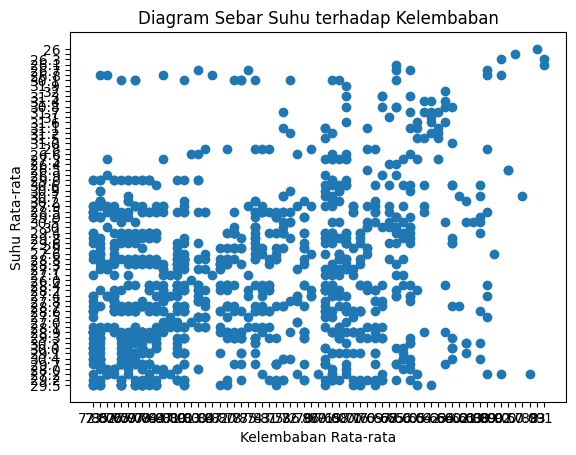

In [ ]:
# Visualisasi data (Contoh: Diagram sebar suhu terhadap kelembaban)
plt.scatter(weather_data["humid_avg"], weather_data["temp_avg"])
plt.title("Diagram Sebar Suhu terhadap Kelembaban")
plt.xlabel("Kelembaban Rata-rata")
plt.ylabel("Suhu Rata-rata")
plt.show()

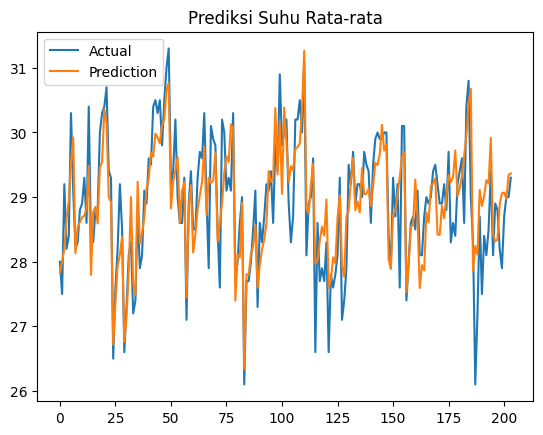

In [ ]:
# Visualisasi hasil prediksi
predictions_pd = predictions.select("temp_avg", "prediction").toPandas()
plt.plot(predictions_pd["temp_avg"], label="Actual")
plt.plot(predictions_pd["prediction"], label="Prediction")
plt.title("Prediksi Suhu Rata-rata")
plt.legend()
plt.show()